In [1]:
from embed_time.transforms import complex_normalisation
import os
import skimage.io as io

data_location = "/mnt/efs/dlmbl/G-et/data/live-TLS"

folder_imgs = data_location +"/"+'Control_Dataset_4TP'
metadata = data_location + "/" +'Control_Dataset_4TP_Ground_Truth'
out_normalised = data_location + "/" +'Control_Dataset_4TP_Normalized'
if not os.path.isdir(out_normalised):
    os.mkdir(out_normalised)

img_list = [path for path in os.listdir(folder_imgs) if path.endswith(".tif")]
img_list


['CTRLD_TR_PLATE_2_ID_G9.tif',
 'CTRLD_RR_PLATE_6_ID_E9.tif',
 'CTRLD_RR_PLATE_1_ID_B10.tif',
 'CTRLD_RR_PLATE_4_ID_G9.tif',
 'CTRLD_RR_PLATE_1_ID_B1.tif',
 'CTRLD_RR_PLATE_1_ID_A2.tif',
 'CTRLD_RR_PLATE_4_ID_H8.tif',
 'CTRLD_RR_PLATE_6_ID_H6.tif',
 'CTRLD_TR_PLATE_1_ID_H9.tif',
 'CTRLD_RR_PLATE_1_ID_H3.tif',
 'CTRLD_RR_PLATE_4_ID_F2.tif',
 'CTRLD_TR_PLATE_2_ID_D4.tif',
 'CTRLD_TR_PLATE_1_ID_H10.tif',
 'CTRLD_TR_PLATE_1_ID_B7.tif',
 'CTRLD_TR_PLATE_1_ID_F12.tif',
 'CTRLD_RR_PLATE_4_ID_B6.tif',
 'CTRLD_RR_PLATE_1_ID_D7.tif',
 'CTRLD_TR_PLATE_1_ID_F3.tif',
 'CTRLD_RR_PLATE_1_ID_B9.tif',
 'CTRLD_TR_PLATE_1_ID_D5.tif',
 'CTRLD_TR_PLATE_1_ID_G11.tif',
 'CTRLD_TR_PLATE_2_ID_B6.tif',
 'CTRLD_RR_PLATE_1_ID_F5.tif',
 'CTRLD_RR_PLATE_6_ID_C12.tif',
 'CTRLD_RR_PLATE_4_ID_G1.tif',
 'CTRLD_TR_PLATE_2_ID_E3.tif',
 'CTRLD_RR_PLATE_6_ID_C3.tif',
 'CTRLD_TR_PLATE_2_ID_E12.tif',
 'CTRLD_TR_PLATE_1_ID_C6.tif',
 'CTRLD_RR_PLATE_6_ID_E10.tif',
 'CTRLD_RR_PLATE_4_ID_C5.tif',
 'CTRLD_RR_PLATE_1_ID_E6.tif',
 

In [4]:
from tifffile import imsave
for pth in img_list:
    img = io.imread(folder_imgs+"/"+pth)
    norm = complex_normalisation(img,bf_quant=[0.001,0.999],bra_quant=[0.001,0.999])
    imsave(out_normalised+"/"+pth,norm)

/tmp/ipykernel_73419/1519346741.py:5: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(out_normalised+"/"+pth,norm)


In [2]:
from embed_time.dataloader import LiveTLSDataset

dataset = LiveTLSDataset(metadata,out_normalised,metadata_columns=["Run","Plate","ID"],return_metadata=True)
img, l, m = dataset[0]

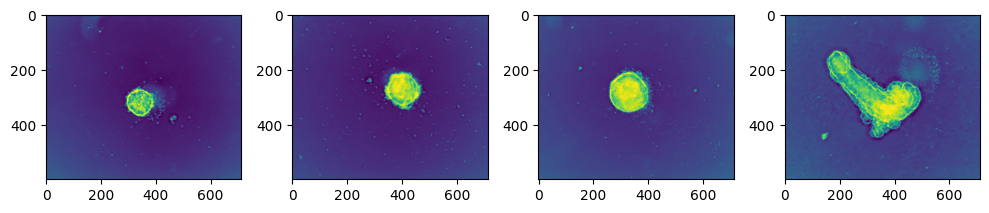

In [3]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,4,figsize=(10,5))
for i,ax in enumerate(axs):
    ax.imshow(img[i][0])
plt.tight_layout()

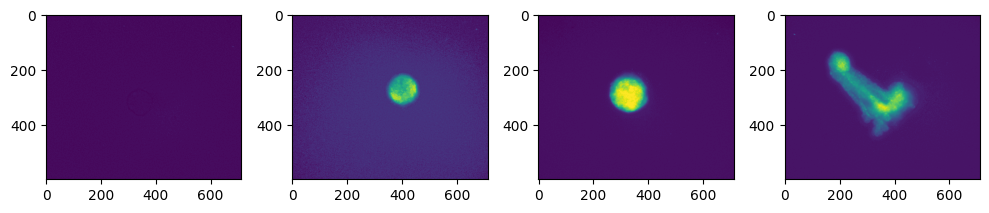

In [4]:
fig,axs = plt.subplots(1,4,figsize=(10,5))
for i,ax in enumerate(axs):
    ax.imshow(img[i][1])
plt.tight_layout()

In [6]:
import torchvision.transforms as trans
from torchvision.transforms import v2
from embed_time.transforms import CustomToTensor


loading_transforms = trans.Compose([
    CustomToTensor()
])

dataset_w_t = LiveTLSDataset(
    metadata,
    out_normalised,
    metadata_columns=["Run","Plate","ID"],
    return_metadata=True,
    transform = loading_transforms,
)

tensor, l, m = dataset_w_t[0]
tensor.shape

# Doesn't work need to make our own to tensor

torch.Size([4, 2, 598, 712])

In [13]:
from embed_time.transforms import SelectRandomTimepoint

sel_tp = SelectRandomTimepoint(time_dimension=0)

sel_tp(tensor).shape

torch.Size([2, 598, 712])